# Comparison of two indices 

For this analysis, I analyse two different indices, both small cap. The US S&P 600 Small Caps and the Eurostoxx Small, both from the iShares ETF page. Both ETFs are optimized in their replication method, meaning that they try to follow the devlopment of their benchmark not by replicating the composition exactly but in a similar fashion. Companies in these ETFs therefore are not exactly the same as in the original indices. 

According to finanzen.net, the closing of the change between EUR and USD was 1.1986. 

## General information 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

In [2]:
#Read in the datasets and save as Pandas Dataframe 
sp600small=pd.read_csv('IUS3_holdings.csv', engine='python', skiprows=1, encoding='UTF8', thousands='.', decimal=',')
eurostoxxsmall=pd.read_csv('IQQS_holdings.csv', engine='python', skiprows=1, encoding='UTF8', thousands='.', decimal=',')

sp600small=pd.DataFrame(sp600small)
eurostoxxsmall=pd.DataFrame(eurostoxxsmall)

exchange_rate_EUR_USD=1.1986

In [3]:
md(f"The S&P 600 Small ETF has {len(sp600small)} items. The Eurostoxx Small ETF is much smaller with {len(eurostoxxsmall)} items only.")

The S&P 600 Small ETF has 606 items. The Eurostoxx Small ETF is much smaller with 95 items only.

In [4]:
market_value_EU=eurostoxxsmall.groupby(['Marktwährung']).agg({'Marktwert': sum})
print(market_value_EU.loc['EUR'])

market_value_US=sp600small.groupby(['Marktwährung']).agg({'Marktwert': sum})
print(market_value_US.loc['USD'])

Marktwert    530860911
Name: EUR, dtype: int64
Marktwert    1400662760
Name: USD, dtype: int64


In [5]:
round(market_value_EU.loc['EUR']*exchange_rate_EUR_USD/market_value_US.loc['USD'], 2)

Marktwert    0.45
dtype: float64

The European index represents not even half the marketvalue of the US American index. It is nevertheless impressive: With the smaller index having 1/6 of the number of companies. The average marketvalue of a company in the index (including the cash positions) of Europe is therefore nearly 4 times the size of one of the US American one. 

For investors, each company in the European index can be thought of as more valuable than the ones in the American index. 

In [6]:
print('S&P 600 Small: ', round(sp600small['Marktwert'].mean()), 'USD')
print('Eurostoxx Small: ', round(eurostoxxsmall['Marktwert'].mean()*exchange_rate_EUR_USD), 'USD')

S&P 600 Small:  2311625 USD
Eurostoxx Small:  6699994 USD


## Sector analysis 

In [7]:
share_by_sector=sp600small.groupby('Sektor', as_index=False).agg({'Gewichtung (%)': sum, 
                                                                 'Marktwert':sum})

In [8]:
share_by_sector.sort_values(by=['Gewichtung (%)'], ascending=False)

,Sektor,Gewichtung (%),Marktwert
6,Industrie,17.88,250302439
2,Financials,17.52,245486339
11,Zyklische Konsumgüter,16.17,226229927
4,IT,13.29,186051431
3,Gesundheitsversorgung,11.22,157036112
5,Immobilien,7.27,101858931
8,Materialien,4.90,68439879
1,Energie,4.19,58571915
9,Nichtzyklische Konsumgüter,3.83,53947893
7,Kommunikation,2.10,29724378


In [9]:
share_by_sector_EU=eurostoxxsmall.groupby('Sektor', as_index=False).agg({'Gewichtung (%)': sum,
                                                                        'Marktwert':sum})
share_by_sector_EU['Marktwert']=share_by_sector_EU['Marktwert']*exchange_rate_EUR_USD
share_by_sector_EU.sort_values(by=['Gewichtung (%)'], ascending=False)

,Sektor,Gewichtung (%),Marktwert
6,Industrie,17.34,1.103053e+08
5,Immobilien,14.05,8.939141e+07
2,Financials,13.44,8.554180e+07
7,Kommunikation,9.12,5.809825e+07
10,Versorger,8.11,5.160769e+07
8,Materialien,7.42,4.727109e+07
3,Gesundheitsversorgung,7.23,4.595431e+07
4,IT,6.72,4.273739e+07
11,Zyklische Konsumgüter,5.85,3.728636e+07
9,Nichtzyklische Konsumgüter,5.69,3.625518e+07


In [10]:
shares_sector_indices=pd.merge(share_by_sector_EU, share_by_sector, on='Sektor', suffixes=('_EU','_US'))
shares_sector_indices['Difference in %points']=shares_sector_indices['Gewichtung (%)_EU']-shares_sector_indices['Gewichtung (%)_US']
shares_sector_indices['Difference in Marketvalue']=shares_sector_indices['Marktwert_EU']-shares_sector_indices['Marktwert_US']
shares_sector_indices.sort_values(by='Gewichtung (%)_EU', ascending=False)

,Sektor,Gewichtung (%)_EU,Marktwert_EU,Gewichtung (%)_US,Marktwert_US,Difference in %points,Difference in Marketvalue
6,Industrie,17.34,1.103053e+08,17.88,250302439,-0.54,-1.399971e+08
5,Immobilien,14.05,8.939141e+07,7.27,101858931,6.78,-1.246752e+07
2,Financials,13.44,8.554180e+07,17.52,245486339,-4.08,-1.599445e+08
7,Kommunikation,9.12,5.809825e+07,2.10,29724378,7.02,2.837387e+07
10,Versorger,8.11,5.160769e+07,1.38,19229321,6.73,3.237836e+07
8,Materialien,7.42,4.727109e+07,4.90,68439879,2.52,-2.116879e+07
3,Gesundheitsversorgung,7.23,4.595431e+07,11.22,157036112,-3.99,-1.110818e+08
4,IT,6.72,4.273739e+07,13.29,186051431,-6.57,-1.433140e+08
11,Zyklische Konsumgüter,5.85,3.728636e+07,16.17,226229927,-10.32,-1.889436e+08
9,Nichtzyklische Konsumgüter,5.69,3.625518e+07,3.83,53947893,1.86,-1.769271e+07


In [11]:
more_important_US=shares_sector_indices['Difference in %points']<0
more_important_EU=shares_sector_indices['Difference in %points']>0

In [12]:
shares_sector_indices[more_important_US].sort_values(by='Difference in %points', ascending=True)

,Sektor,Gewichtung (%)_EU,Marktwert_EU,Gewichtung (%)_US,Marktwert_US,Difference in %points,Difference in Marketvalue
11,Zyklische Konsumgüter,5.85,3.728636e+07,16.17,226229927,-10.32,-1.889436e+08
4,IT,6.72,4.273739e+07,13.29,186051431,-6.57,-1.433140e+08
2,Financials,13.44,8.554180e+07,17.52,245486339,-4.08,-1.599445e+08
3,Gesundheitsversorgung,7.23,4.595431e+07,11.22,157036112,-3.99,-1.110818e+08
6,Industrie,17.34,1.103053e+08,17.88,250302439,-0.54,-1.399971e+08


In [13]:
shares_sector_indices[more_important_EU].sort_values(by='Difference in %points', ascending=False)

,Sektor,Gewichtung (%)_EU,Marktwert_EU,Gewichtung (%)_US,Marktwert_US,Difference in %points,Difference in Marketvalue
7,Kommunikation,9.12,5.809825e+07,2.10,29724378,7.02,2.837387e+07
5,Immobilien,14.05,8.939141e+07,7.27,101858931,6.78,-1.246752e+07
10,Versorger,8.11,5.160769e+07,1.38,19229321,6.73,3.237836e+07
8,Materialien,7.42,4.727109e+07,4.90,68439879,2.52,-2.116879e+07
9,Nichtzyklische Konsumgüter,5.69,3.625518e+07,3.83,53947893,1.86,-1.769271e+07
1,Energie,4.54,2.890791e+07,4.19,58571915,0.35,-2.966400e+07
0,Cash und/oder Derivate,0.50,3.142728e+06,0.28,3966105,0.22,-8.233770e+05


There are important differences in the composition of the indices: While the US set more importance (in terms of share of the index) on consumer goods, IT, Financials and Health companies, the European index has an comparable overweight of communications, utilities, real estate, materials and non-cyclical consumer goods. Small differences are for the sectors of industry, energy and the cash reserve. 

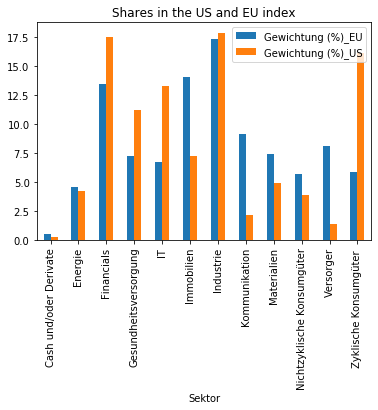

In [14]:
plot_df=shares_sector_indices[['Sektor', 'Gewichtung (%)_EU', 'Gewichtung (%)_US']]
plot_df=plot_df.set_index('Sektor')
plot_df.plot.bar(title='Shares in the US and EU index')

The two plots above and below display the variance in importance of the various sectors. 

Below, the sectors are displayed according to their share in the ETF in the American and European index. The diagonal line represents the exact equality. Above the line, sectors are more important in the US index, below the line represents an overweight in importance in the European index. 

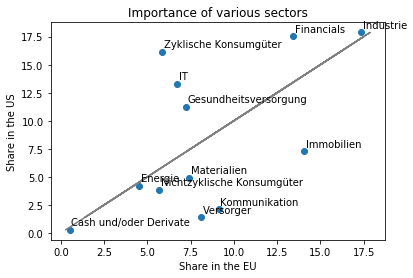

In [15]:
import matplotlib.pyplot as plt

y = plot_df['Gewichtung (%)_US']
z = plot_df['Gewichtung (%)_EU']
n = plot_df.index

fig, ax = plt.subplots()
ax.scatter(z, y)
ax.plot(y,y, color='grey')

plt.title("Importance of various sectors")
plt.xlabel("Share in the EU") 
plt.ylabel("Share in the US")

for i in range(0, len(plot_df)):
    ax.annotate(n[i], (z[i]+0.1, y[i]+0.4))

plt.show()

### Characteristics

#### Stock exchange

In [19]:
share_by_stockexchange=sp600small.groupby('Börse', as_index=False).agg({'Gewichtung (%)': sum})
share_by_stockexchange.sort_values(by=['Gewichtung (%)'], ascending=False)

,Börse,Gewichtung (%)
3,New York Stock Exchange Inc.,50.05
2,NASDAQ,49.35
4,Nyse Mkt Llc,0.35
0,-,0.28
1,Chicago Mercantile Exchange,0.00


In [178]:
share_by_stockexchange_EU=eurostoxxsmall.groupby('Börse', as_index=False).agg({'Gewichtung (%)': "sum"})
share_by_stockexchange_EU.sort_values(by=['Gewichtung (%)'], ascending=False)

,Börse,Gewichtung (%)
9,Nyse Euronext - Euronext Paris,26.90
11,Xetra,22.73
2,Borsa Italiana,10.29
7,Nyse Euronext - Euronext Brussels,9.06
4,Euronext Amsterdam,8.20
10,Wiener Boerse Ag,7.02
1,Bolsa De Madrid,5.84
6,Nasdaq Omx Helsinki Ltd.,5.31
8,Nyse Euronext - Euronext Lisbon,2.11
5,Irish Stock Exchange - All Market,2.05


While the US American ETF companies are listed at US American stock exchanges, the NY Stock Exchange without a special focus and the NASDAQ with a focus on tech companies. 

European companies however are differing  in terms of geography: With the most important stock exchange is the one in Paris, followed by the digital German stock exchange Xetra, then Italy, Belgium  and the Netherlands. 

Both ETFs invest mostly in equity. There are small shares of derivates and cash. 

#### Asset classes

In [20]:
sp600small.groupby('Anlageklasse', as_index=False).agg({'Gewichtung (%)': sum})

,Anlageklasse,Gewichtung (%)
0,Aktien,99.75
1,Cash Collateral and Margins,0.00
2,Futures,0.00
3,Geldmarkt,0.28


In [21]:
eurostoxxsmall.groupby('Anlageklasse', as_index=False).agg({'Gewichtung (%)': sum})

,Anlageklasse,Gewichtung (%)
0,Aktien,99.51
1,Cash Collateral and Margins,0.04
2,Futures,0.00
3,Geldmarkt,0.38
4,Money Market,0.08


In [27]:
print(eurostoxxsmall.groupby('Anlageklasse', as_index=False).agg({'Marktwert': sum}))
print(sp600small.groupby('Anlageklasse', as_index=False).agg({'Marktwert': sum}))

                  Anlageklasse  Marktwert
0                       Aktien  528413769
1  Cash Collateral and Margins     216440
2                      Futures          0
3                    Geldmarkt    1978275
4                 Money Market     427284
                  Anlageklasse   Marktwert
0                       Aktien  1396878565
1  Cash Collateral and Margins       66000
2                      Futures           0
3                    Geldmarkt     3900105


Both ETFs invest in stocks in the main. The European ETF holds a sizable position for cash collaterals as used in derivates or  as a deposit for short positions. Also, the money market position is higher in relative terms than that of the US ETF. However, in absolute terms, it is similar in both products. 

When looking at the currencies the positions are denoted, it is not surprising that US ETF mostly operates in USD, and the European ETF in EUR. Very small positions in the US product are denoted in EUR and GBP. These are only money market positions, no equity. Conversely, the same is true for the European product, that holds only money market positions in foreign currency. 

In [31]:
sp600small.groupby(['Marktwährung', 'Anlageklasse'], as_index=False).agg({'Gewichtung (%)': "sum"})

,Marktwährung,Anlageklasse,Gewichtung (%)
0,EUR,Geldmarkt,0.00
1,GBP,Geldmarkt,0.01
2,USD,Aktien,99.75
3,USD,Cash Collateral and Margins,0.00
4,USD,Futures,0.00
5,USD,Geldmarkt,0.27


In [30]:
eurostoxxsmall.groupby(['Marktwährung', 'Anlageklasse'], as_index=False).agg({'Gewichtung (%)': "sum"})

,Marktwährung,Anlageklasse,Gewichtung (%)
0,EUR,Aktien,99.51
1,EUR,Cash Collateral and Margins,0.04
2,EUR,Futures,0.00
3,EUR,Geldmarkt,0.34
4,EUR,Money Market,0.08
5,GBP,Geldmarkt,0.03
6,USD,Geldmarkt,0.01


Differences by countries 

With the S&P 600 Small being an US American index, it is not surprising that nearly all the companies in the index have the US as their country of domicile. Only one is based in the UK: 

In [17]:
sp600small.groupby('Standort').agg({'Gewichtung (%)': sum}).sort_values(by='Gewichtung (%)', ascending=False)

,Gewichtung (%)
Standort,
Vereinigte Staaten,100.02
Vereinigtes Königreich,0.01
-,0.00
Europäische Union,0.00


In [18]:
uk_based=sp600small['Standort'].str.match('Vereinigtes Königreich')
sp600small[uk_based]

,Emittententicker,Name,Anlageklasse,Gewichtung (%),Kurs,Nominale,Marktwert,Nominalwert,Sektor,ISIN,Börse,Standort,Marktwährung
599,GBP,GBP CASH,Geldmarkt,0.01,139.69,130220,181904,181904.28,Cash und/oder Derivate,-,-,Vereinigtes Königreich,GBP


The only non-American position in the ETF is Cash or Derivates in the United Kingdom. This makes up for only 0.01% of the ETF volume. 

This is different for the European Small Cap ETF. This covers several European countries, mainly from Western and Northern Europe. There are also small positions in the US, the UK and the EU directly. All of them are Cash and/or Derivates. 

In [19]:
eurostoxxsmall.groupby('Standort').agg({'Gewichtung (%)': sum}).sort_values(by='Gewichtung (%)', ascending=False)

,Gewichtung (%)
Standort,
Frankreich,25.72
Deutschland,22.73
Italien,10.29
Belgien,9.06
Niederlande,8.20
Österreich,7.02
Spanien,5.84
Finnland,5.31
Irland,2.13


In [20]:
external_based=(eurostoxxsmall['Standort'].str.match('Vereinigtes Königreich'))|(eurostoxxsmall['Standort'].str.match('Europäische Union'))|(eurostoxxsmall['Standort'].str.match('Vereinigte Staaten'))
eurostoxxsmall[external_based]

,Emittententicker,Name,Anlageklasse,Gewichtung (%),Kurs,Nominale,Marktwert,Nominalwert,Sektor,ISIN,Börse,Standort,Marktwährung
39,FTI,TECHNIPFMC PLC,Aktien,1.18,7.60,822249,6250737,6250736.90,Energie,GB00BDSFG982,Nyse Euronext - Euronext Paris,Vereinigte Staaten,EUR
89,EUR,EUR CASH,Geldmarkt,0.34,100.00,1803418,1803418,1803417.97,Cash und/oder Derivate,-,-,Europäische Union,EUR
91,BZFUT,CASH COLLATERAL EUR BZFUT,Cash Collateral and Margins,0.04,100.00,216440,216440,216440.00,Cash und/oder Derivate,-,-,Europäische Union,EUR
92,GBP,GBP CASH,Geldmarkt,0.03,116.79,113781,132888,132887.61,Cash und/oder Derivate,-,-,Vereinigtes Königreich,GBP
93,USD,USD CASH,Geldmarkt,0.01,83.61,50197,41969,41968.68,Cash und/oder Derivate,-,-,Vereinigte Staaten,USD
94,VGH1,EURO STOXX 50 MAR 21,Futures,0.00,3844.00,64,0,2460160.00,Cash und/oder Derivate,DE000C31Y1X2,Eurex Deutschland,Europäische Union,EUR


Are there companies that are the same?

In [21]:
common_companies=pd.merge(left=eurostoxxsmall, right=sp600small, on='Name', how='inner')

common_companies

,Emittententicker_x,Name,Anlageklasse_x,Gewichtung (%)_x,Kurs_x,Nominale_x,Marktwert_x,Nominalwert_x,Sektor_x,ISIN_x,...,Gewichtung (%)_y,Kurs_y,Nominale_y,Marktwert_y,Nominalwert_y,Sektor_y,ISIN_y,Börse_y,Standort_y,Marktwährung_y
0,EUR,EUR CASH,Geldmarkt,0.34,100.00,1803418,1803418,1803417.97,Cash und/oder Derivate,-,...,0.00,119.60,5,6,5.86,Cash und/oder Derivate,-,-,Europäische Union,EUR
1,GBP,GBP CASH,Geldmarkt,0.03,116.79,113781,132888,132887.61,Cash und/oder Derivate,-,...,0.01,139.69,130220,181904,181904.28,Cash und/oder Derivate,-,-,Vereinigtes Königreich,GBP
2,USD,USD CASH,Geldmarkt,0.01,83.61,50197,41969,41968.68,Cash und/oder Derivate,-,...,0.27,100.00,3718195,3718195,3718195.02,Cash und/oder Derivate,-,-,Vereinigte Staaten,USD


The only shared positions are those of cash in various currencies: USD, EUR and GBP. 